# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


## Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [1]:
import os
import zipfile
import pandas as pd
import requests

In [2]:

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(40000, random_state=42).reset_index(drop=True)

# Preview the data
print("Sample_df Size:",df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
# print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
# print(test_df.head())


Sample_df Size: (40000, 6)
Training set: (1600000, 6)
Test set: (498, 6)


In [3]:
# df.to_csv("sample_data.csv")

### install all packages you will use & Import All Libraries

In [3]:
# !pip install emoji
# !pip install gensim

In [4]:
# import nltk
# nltk.download("punkt_tab")
# nltk.download("stopwords")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import joblib
import re
import string

# import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

import spacy
import emoji
from wordcloud import WordCloud
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

## EDA

In [6]:
sample_df = df.copy()

In [7]:
sample_df.head()

,target,id,date,flag,user,text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [8]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  40000 non-null  object
 1   id      40000 non-null  int64 
 2   date    40000 non-null  object
 3   flag    40000 non-null  object
 4   user    40000 non-null  object
 5   text    40000 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [9]:
sample_df.drop(["id", "date", "user", "flag"], inplace=True, axis=1)

* We drop all this columns becuase we work only on text & target

In [10]:
sample_df.isnull().sum()

,0
target,0
text,0


In [11]:
print(sample_df.duplicated().sum())
sample_df.drop_duplicates(inplace=True)

67


In [12]:
sample_df.describe(include="object")

,target,text
count,39933,39933
unique,2,39929
top,negative,just woke up
freq,19979,2


In [13]:
sample_df.head()

,target,text
0,negative,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,@TiannaChaos i know just family drama. its la...
3,negative,School email won't open and I have geography ...
4,negative,upper airways problem


In [14]:
sample_df["text"].sample(5).tolist()

["@chelseasms Awwww honey, I can't imagine!!!  If the iPod gods don't come through with your prayer, you can buy a shuffle for like 50$ ",
 'My Sonic skills have not improved... Running, fine. Spinning, awesome. Jump from platform to platform? The fail whale grabs me ',
 '@Samantha008 im good thanks  wubu2?',
 "@nikkidarrie I KNOW I'm nocturnal. ",
 '@krlikyu Thank you! ']

* We notice that there is:
  1. "....", "@ mentions", "URL", ";)", "&quot;"

* Class Distribution

In [15]:
print(sample_df["target"].value_counts())

target
negative    19979
positive    19954
Name: count, dtype: int64


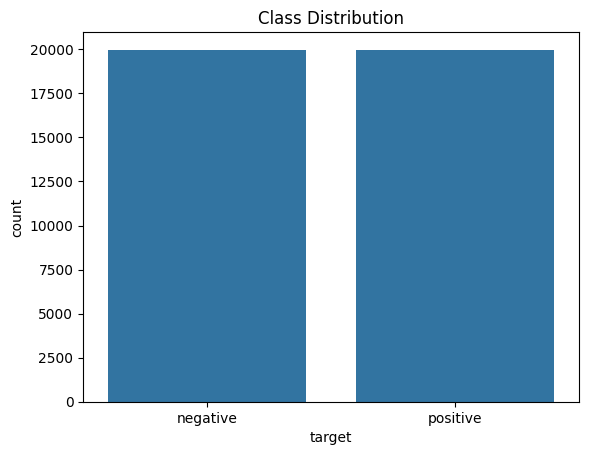

In [16]:
sns.countplot(data=sample_df, x="target")
plt.title("Class Distribution")
plt.show()

* The Positive & Negative labels are balanced

* Tweet Length Histogram

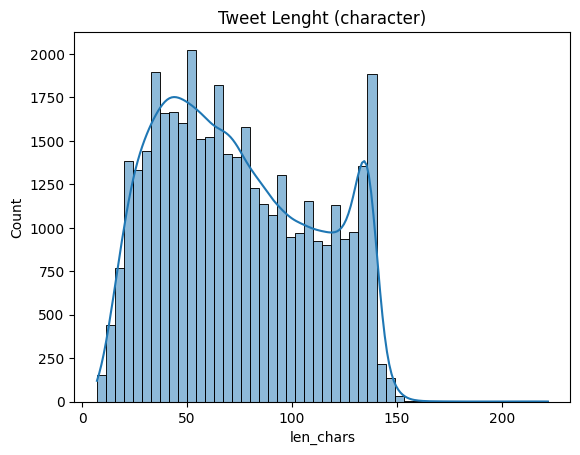

In [17]:
sample_df["len_chars"] = sample_df["text"].str.len()
sns.histplot(data=sample_df, x="len_chars",kde=True, bins=50)
plt.title("Tweet Lenght (character)")
plt.show()

In [18]:
print("mean of len_chars", int(sample_df["len_chars"].mean()))

mean of len_chars 74


In [19]:
# from wordcloud import WordCloud
# from collections import Counter
# import re

* Most Words appear in text column before we do any cleaning

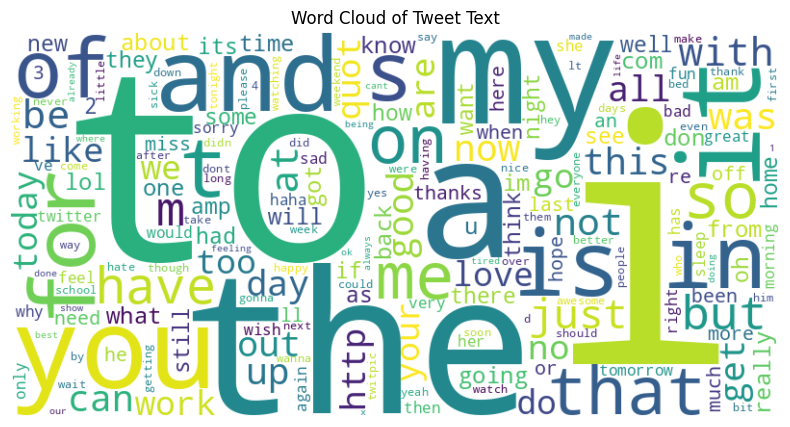

In [20]:
# Combine all the text data into a single string
all_text = " ".join(sample_df["text"])

# Tokenize and count word frequencies (basic tokenization, can be improved)
# Remove non-alphabetic characters and convert to lowercase
words = re.findall(r'\b\w+\b', all_text.lower())
word_counts = Counter(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweet Text")
plt.show()

## Text Preprocessing

In [21]:
# import nltk
# nltk.download("punkt_tab")
# nltk.download("stopwords")

In [22]:
# import nltk
# from nltk.tokenize import word_tokenize
# from collections import Counter

In [23]:
sample_df["text"].sample(5).tolist()

['@jaxel042 Call me.  Seriously, I miss you ',
 "last night in Shanghai, then off to the States in the morning. I'll miss u China! ",
 "Didn't realize that there's gallons of ice cream in the freezer !  yayyyyyy",
 '@emseeaych Congratulations!  Food is good too. And drink. Haha, go indulge. You deserve it.',
 "@gemmak500 morning. Well it's Dull in Hull this morning  feels like rain"]

#### Regex Pattern
1. remove URLs, mentions, hastags, emojis


In [24]:
# pip install emoji

In [25]:
# import re
# import emoji


In [26]:
def clean_tweet(text, demojize=True, hashtag_handling='remove_symbol', remove_short_tokens=True):
    """
    Cleans a tweet by removing URLs, mentions, hashtags, emojis, numbers,
    special characters, short tokens, extra whitespace, and ellipsis patterns.
    """

    # emojis -> text
    if demojize:
        text = emoji.demojize(text)

    # remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)

    # remove mentions
    text = re.sub(r"@\w+", "", text)

    # hashtags
    if hashtag_handling == 'remove_all':
        text = re.sub(r"#\w+", "", text)
    elif hashtag_handling == 'remove_symbol':
        text = re.sub(r"#(\w+)", r"\1", text)

    # remove ellipsis "..."
    text = re.sub(r"\.{2,}", " ", text)

    # remove ^^
    text = re.sub(r"\^\^", "", text)

    # remove w/
    text = re.sub(r"w/", "", text)

    # remove numbers
    text = re.sub(r"\d+", "", text)

    # remove special characters (keep only letters + space)
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # normalize elongated words (coooool -> coool)
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)

    # remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # remove very short tokens (like "u", "n", "r")
    if remove_short_tokens:
        tokens = text.split()
        tokens = [t for t in tokens if len(t) > 2]  # keeps tokens >= 3 letters
        text = " ".join(tokens)

    return text


tweet1 = "Check out this great library! 😊 https://pypi.org/project/emoji #Python #NLP @user123 and this is an example with ellipsis...."
print("Original Tweet: ===>",tweet1)
cleaned_tweet1 = clean_tweet(tweet1)
print("Without # Signs : ===>",cleaned_tweet1)
cleaned_tweet2 = clean_tweet(tweet1, hashtag_handling="remove_all")
print("Without # Signs&Words: ===>",cleaned_tweet2)

Original Tweet: ===> Check out this great library! 😊 https://pypi.org/project/emoji #Python #NLP @user123 and this is an example with ellipsis....
Without # Signs : ===> Check out this great library smilingfacewithsmilingeyes Python NLP and this example with ellipsis
Without # Signs&Words: ===> Check out this great library smilingfacewithsmilingeyes and this example with ellipsis


In [27]:
examples = sample_df["text"].sample(3).tolist() # Select random tweets and make on them cleaning

for example in examples:
  print("ORGIN:", example)
  print("ClEAN:", clean_tweet(example))
  print("==============================")

ORGIN: it is alwasy funny to assemble a tender dossier at 3am in the morning. 
ClEAN: alwasy funny assemble tender dossier the morning
ORGIN: Having a headache 
ClEAN: Having headache
ORGIN: @Spangila Glad, and yes having a restful day, b4 very busy week  TY for asking
ClEAN: Glad and yes having restful day very busy week for asking


#### Tokenization Comparizon

In [28]:
# from nltk.tokenize import word_tokenize
# import spacy

# Load the spaCy model and increase the max_length
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
nlp.max_length = 4000000  # Increase the limit to accommodate larger text

stopwords_list = set(stopwords.words("english"))

# Function to tokenize using NLTK's word_tokenize and convert to lowercase
def tokenize_nltk(text):
  tokens = word_tokenize(text.lower())
  return [t for t in tokens if t not in stopwords_list and t not in string.punctuation]

# Function to tokenize using spaCy and convert to lowercase
def tokenize_spacy(text):
  tokens = [tok.text for tok in nlp(text.lower())]
  return [t for t in tokens if t not in stopwords_list and t not in string.punctuation]

# Take a sample of the text data
sample_text_data = sample_df["text"].sample(n=1000, random_state=42) # Adjust sample size as needed

# Calculate raw vocabulary size using NLTK (before cleaning)
raw_vocab_nltk = set(tokenize_nltk(" ".join(sample_text_data)))

# Apply cleaning and then tokenize with NLTK
cleaned_sample_text_nltk = sample_text_data.map(clean_tweet)
clean_vocab_nltk = set(tokenize_nltk(" ".join(cleaned_sample_text_nltk)))


# Calculate raw vocabulary size using spaCy (before cleaning)
raw_vocab_spaCy = set(tokenize_spacy(" ".join(sample_text_data)))

# Apply cleaning and then tokenize with spaCy
cleaned_sample_text_spacy = sample_text_data.map(clean_tweet)
clean_vocab_spacy = set(tokenize_spacy(" ".join(cleaned_sample_text_spacy)))


print(f"Raw Vocabulary Size (NLTK): {len(raw_vocab_nltk)}")
print(f"Cleaned Vocabulary Size (NLTK): {len(clean_vocab_nltk)}")
print(f"Raw Vocabulary Size (spaCy): {len(raw_vocab_spaCy)}")
print(f"Cleaned Vocabulary Size (spaCy): {len(clean_vocab_spacy)}")

Raw Vocabulary Size (NLTK): 3575
Cleaned Vocabulary Size (NLTK): 2873
Raw Vocabulary Size (spaCy): 3579
Cleaned Vocabulary Size (spaCy): 2846


In [29]:
# print(clean_vocab_spacy)
# print(clean_vocab_nltk)

* Word_tokenize --> typically works on a single string so we must make join between all sentences  to be One Big Sentence then make Word_tokenize

In [30]:
# import string
# from nltk.corpus import stopwords


In [31]:
stopwords_list = set(stopwords.words("english"))
def preprocess_tokens(text, remove_stopwords=True, replace_numbers=True):
  """
  1. we remove any link and mention and hashtag
  2. we convert text to lowercase
  3. we can replace numbers by  <NUM>
  4. we tokenize and remove punctuation
  5. we remove stop words
  """
  text = clean_tweet(text) # remove any patterns using regex
  text = text.lower() # casefolding
  if replace_numbers:
    # text = re.sub(r"\b\d+\b", " <NUM> ", text)
    text = re.sub(r"\b\d+\b", "", text)


  tokens = [t for t in word_tokenize(text) if t not in string.punctuation]
  if remove_stopwords:
    tokens = [t for t in tokens if t not in stopwords_list]
  # text = " ".join(tokens)
  return tokens

In [32]:
# Apply the preprocess_tokens function to each tweet in the sampled Series
processed_tweets = sample_df["text"].apply(preprocess_tokens)

# Print the processed tweets without stopwords without hyperlinks or Hashtags without numbers
for tweet_tokens in processed_tweets:
  print(tweet_tokens)

Streaming output truncated to the last 5000 lines.
['paulinaohh', 'viciousdelicious', 'great', 'honestly', 'going', 'warped', 'shows', 'yeah']
['gon', 'na', 'get', 'shots', 'right']
['saw', 'really', 'cute', 'dog', 'today', 'made', 'miss', 'dog', 'lives', 'different', 'state', 'parents']
['nice', 'fun', 'morning', 'person', 'spain', 'working', 'time', 'mornings', 'start']
['jazminehaha', 'remembered', 'yesiowe', 'birthday', 'kisses']
['good', 'molly', 'cuddle', 'storm', 'pass', 'need', 'rain', 'fig', 'trees', 'going', 'loose', 'figs']
['man', 'ima', 'try', 'come', 'sunday', 'sure', 'nowhere', 'found']
['jon', 'sure', 'wake', 'early']
['think', 'everyone', 'download', 'twhirl', 'cause', 'better', 'normal', 'twitter']
['see', 'pam']
['putting', 'pants', 'tomorrow', 'gon', 'na', 'hurt', 'really', 'bad']
['aww', 'unfair', 'lucky']
['quotthe', 'needs', 'many', 'outweigh', 'needs', 'onequot', 'aww', 'spock', 'best', 'funeral', 'though']
['youre', 'lucky', 'famous', 'talented', 'seems', 'way'

#### Stemming VS Lemmatization

In [33]:
# from nltk.stem import PorterStemmer

In [34]:
ps = PorterStemmer()

sample_words= ["running", "run", "ran", "better", "runningly", "studies", "studying", "cars", "childern", "happier"
              , "isn't", "organization", "organized", "easily", "faster", "worse", "bought", "buying", "studies", "studies", "analysis"
              ]

print("WORD | STEM | LEMMA BY SPACY")
for w in sample_words:
  stem = ps.stem(w) #  using nltk --> stemmer
  doc = nlp(w) # using spaCy -->lematization
  lemma = doc[0].lemma_
  print(f"{w} | {stem} | {lemma}")



WORD | STEM | LEMMA BY SPACY
running | run | run
run | run | run
ran | ran | run
better | better | well
runningly | runningli | runningly
studies | studi | study
studying | studi | study
cars | car | car
childern | childern | childern
happier | happier | happy
isn't | isn't | be
organization | organ | organization
organized | organ | organize
easily | easili | easily
faster | faster | fast
worse | wors | bad
bought | bought | buy
buying | buy | buy
studies | studi | study
studies | studi | study
analysis | analysi | analysis


In [35]:
# Create stemmed and lemmatized text columns for the dataset

def stem_text(text):
  toks = preprocess_tokens(text, remove_stopwords=True)
  stems = [ps.stem(t) for t in toks]
  return " ".join(stems)

def lemmatize_text(text):
  # Ensure input to nlp is a string
  processed_text = " ".join(preprocess_tokens(text))
  doc = nlp(processed_text)
  lemmas = [tok.lemma_ for tok in doc if not tok.is_punct and not tok.is_space]
  return " ".join(lemmas)


sample_df["stem_text"] = sample_df["text"].map(stem_text)
sample_df["lemma_text"] = sample_df["text"].map(lemmatize_text)

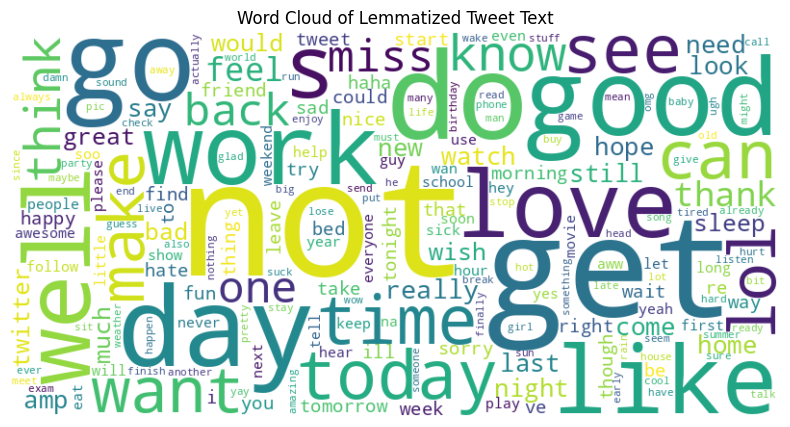

In [36]:
# Combine all the lemmatized text data into a single string
all_lemma_text = " ".join(sample_df["lemma_text"])

# Tokenize and count word frequencies (basic tokenization, can be improved)
# Remove non-alphabetic characters and convert to lowercase
words = re.findall(r'\b\w+\b', all_lemma_text.lower())
word_counts = Counter(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Lemmatized Tweet Text")
plt.show()

In [37]:
def pos_counts(text):
  doc = nlp(clean_tweet(text))
  noun = sum(1 for tok in doc if tok.pos_ == "NOUN")
  verb = sum(1 for tok in doc if tok.pos_ == "VERB")
  adj = sum(1 for tok in doc if tok.pos_ == "ADJ")
  return noun, verb, adj

sample_df[["noun_count", "verb_count", "adj_count"]] = sample_df["text"].apply(lambda t: pd.Series(pos_counts(t)))

In [38]:
sample_df.sample(4)

,target,text,len_chars,stem_text,lemma_text,noun_count,verb_count,adj_count
14590,positive,@mileycyrus love love lovedddd the hannah mont...,96,love love lovedd hannah montana movi listen ol...,love love lovedd hannah montana movie listen o...,4,1,1
11075,positive,@do0dlebugdebz jst the same hope u make it..ni...,137,jst hope make nice knw may frm small islandbt ...,jst hope make nice knw may frm small islandbt ...,5,2,3
24153,negative,I feel the need to stay at home in my pjs the ...,100,feel need stay home pj whole morn unfortun isn...,feel need stay home pjs whole morning unfortun...,4,4,1
16599,positive,made my updates unprotected dunno why but i did,48,made updat unprotect dunno,make update unprotected dunno,1,2,1


## Text Representation

1. Using Bag Of Words
2. Using TFIDF

In [39]:
# Represent by BagofWords
bow = CountVectorizer()
tfidf = TfidfVectorizer()

X_bow = bow.fit_transform(sample_df["lemma_text"])
X_tfidf = tfidf.fit_transform(sample_df["lemma_text"])


print("BOW Vocab Size", len(bow.vocabulary_))
print("TFIDF shape:", X_tfidf.shape)


BOW Vocab Size 27879
TFIDF shape: (39933, 27879)


* Word2Vec

In [40]:
# !pip install gensim

In [41]:
# from gensim.models import Word2Vec

In [42]:
sentences = sample_df["text"].map(lambda t: preprocess_tokens(t, remove_stopwords=False)).tolist()
w2v_model = Word2Vec(sentences, window=5, min_count=5, workers=4, epochs=5)


def avg_w2v(tokens, model, size=100):
    vecs = [model.wv[t] for t in tokens if t in model.wv.key_to_index]
    if len(vecs) == 0:
      return np.zeros(size)
    return np.mean(vecs, axis=0)

X_w2v = np.vstack(sample_df["text"].map(lambda t: avg_w2v(preprocess_tokens(t, remove_stopwords=False), w2v_model)).values)
print("W2V matrix shape:", X_w2v.shape)

W2V matrix shape: (39933, 100)


## Model Training

In [43]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.feature_extraction.text import  TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

In [44]:
# Prepare DataFrame X with 'text' and pos counts
X = sample_df[['text','noun_count','verb_count','adj_count']].copy()
y = sample_df['target']


* Represent Text by TFIDF

In [45]:
# ColumnTransformer: text -> TFIDF ; numeric -> scaler passthrough
col_trans_tfidf = ColumnTransformer([
    ('tfidf', TfidfVectorizer(max_features=10000, preprocessor=clean_tweet), 'text'),
    ('num', StandardScaler(), ['noun_count','verb_count','adj_count'])
])


* Represent Text by Word2Vec

In [46]:
class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model
        self.size = model.vector_size

    def transform(self, X, y=None):
        # Assuming X is a pandas Series or DataFrame with a 'text' column
        if isinstance(X, pd.DataFrame):
            X = X['text']
        return np.vstack(X.map(lambda t: avg_w2v(preprocess_tokens(t, remove_stopwords=False), self.model)).values)

    def fit(self, X, y=None):
        return self

    def get_params(self, deep=True):
        return {'model': self.model}

    def set_params(self, **params):
        for parameter, value in params.items():
            setattr(self, parameter, value)
        return self


col_trans_w2v = ColumnTransformer([
    ('w2v', Word2VecTransformer(w2v_model), 'text'),
    ('num', StandardScaler(), ['noun_count','verb_count','adj_count'])
], remainder='passthrough') # Use remainder='passthrough' to keep other columns if needed

* Comparison between the TFIDF & Word2Vec and Traing LogisticRegression

In [54]:
# Define three pipelines
pipe_lr_tfidf = Pipeline([('pre', col_trans_tfidf), ('clf', LogisticRegression(max_iter=2000))])
pipe_svc_tfidf = Pipeline([('pre', col_trans_tfidf), ('clf', LinearSVC(max_iter=2000))])
pipe_lr_w2v = Pipeline([('pre', col_trans_w2v), ('clf', LogisticRegression(max_iter=2000))])


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Fit and evaluate
for name, pipe in [('Logistic_TFIDF', pipe_lr_tfidf), ('LinearSVC_TFIDF', pipe_lr_w2v), ('Logistic_W2V', pipe_lr_w2v)]: # Added Word2Vec pipeline
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    from sklearn.metrics import accuracy_score, f1_score
    print(name, "acc:", accuracy_score(y_test, preds), "f1:", f1_score(y_test, preds, pos_label="positive"))

Logistic_TFIDF acc: 0.7631150619757106 f1: 0.7667077681874229
LinearSVC_TFIDF acc: 0.706523100037561 f1: 0.7033662363958492
Logistic_W2V acc: 0.706523100037561 f1: 0.7033662363958492


In [48]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support


Evaluation Report for Logistic Regression with TF-IDF
              precision    recall  f1-score   support

    negative       0.77      0.75      0.76      3996
    positive       0.75      0.78      0.77      3991

    accuracy                           0.76      7987
   macro avg       0.76      0.76      0.76      7987
weighted avg       0.76      0.76      0.76      7987



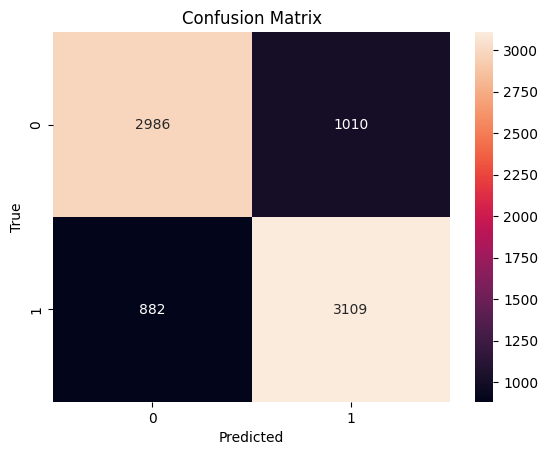

In [49]:
#  pipe_lr_tfidf is the best performing pipeline based on previous evaluation
best_pipe = pipe_lr_tfidf
preds = best_pipe.predict(X_test)

print("Evaluation Report for Logistic Regression with TF-IDF")
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [50]:
# Show 10 misclassified tweets
test_results_df = X_test.copy()
test_results_df['true'] = y_test.values
test_results_df['pred'] = preds
misclassified_tweets = test_results_df[test_results_df['true'] != test_results_df['pred']].sample(10, random_state=5)

print("\n10 Misclassified Tweets:")
for i, row in misclassified_tweets.iterrows():
    print("TRUE:", row['true'], "PRED:", row['pred'])
    print(row['text'])
    print("---")


10 Misclassified Tweets:
TRUE: positive PRED: negative
Bright blue skies in northern England? I must be dreaming. Or maybe I had too much to drink last night. oh, hang on, I did. 
---
TRUE: positive PRED: negative
True Blood ...anyone else sublimating the void in their life since Buffy &amp; Angel went away? I miss the buffyverse ...(sigh)... 
---
TRUE: positive PRED: negative
@bombDUH yes yes! i havent been in sooo long! we should go 
---
TRUE: negative PRED: positive
just woke up can't wait for the day to start yayyyy   
---
TRUE: positive PRED: negative
Started playing Sims again... I missed them so muchly 
---
TRUE: negative PRED: positive
@sn33kers yeah, I figured as much 
---
TRUE: positive PRED: negative
93 days till September 1st!!  #philwickham
---
TRUE: positive PRED: negative
@SukieBunny bah. yes the worst kind of them all #manflu. 
---
TRUE: negative PRED: positive
Happy my friends got to go to Paris and Venice but also jealous because I love Paris and Venice too 
---
TRUE

In [51]:
# import joblib

In [52]:
best_pipe = pipe_lr_tfidf  # choose the best based on previous scores (for example)
joblib.dump(best_pipe, 'sentiment_model.pkl')

['sentiment_model.pkl']

In [53]:
# Load the saved model
loaded_pipeline = joblib.load('sentiment_model.pkl')

# Prepare some sample data for prediction
# You can replace this with your actual new data
sample_data = pd.DataFrame({
    'text': [
        "I love this product! It's amazing.", # positive
        "This is the worst experience I've ever had.", # negative
        "It's okay, not great but not bad either.", # natural
        "Feeling happy today!", # positve
        "So disappointed with the service." # negative
    ],
    'noun_count': [0, 0, 0, 0, 0],
    'verb_count': [0, 0, 0, 0, 0],
    'adj_count': [0, 0, 0, 0, 0]
})

# Make predictions
predictions = loaded_pipeline.predict(sample_data)

# Display predictions
sample_data['prediction'] = predictions
print("Predictions on sample data:")
print(sample_data[['text', 'prediction']])



Predictions on sample data:
                                          text prediction
0           I love this product! It's amazing.   positive
1  This is the worst experience I've ever had.   negative
2     It's okay, not great but not bad either.   negative
3                         Feeling happy today!   positive
4            So disappointed with the service.   negative
